In [1]:
import json

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_columns', 100)

## Задание 1. На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

In [3]:
with open('history.json', 'r') as filestream:
    hist = json.load(filestream)

In [4]:
hist

{'06/1993': {'Sum': [1100.0, 'GFlop/s'],
  '#1': [59.7, 'GFlop/s'],
  '#500': [0.4, 'GFlop/s']},
 '11/1993': {'Sum': [1500.0, 'GFlop/s'],
  '#1': [124.0, 'GFlop/s'],
  '#500': [0.5, 'GFlop/s']},
 '06/1994': {'Sum': [2300.0, 'GFlop/s'],
  '#1': [143.4, 'GFlop/s'],
  '#500': [0.8, 'GFlop/s']},
 '11/1994': {'Sum': [2700.0, 'GFlop/s'],
  '#1': [170.0, 'GFlop/s'],
  '#500': [1.2, 'GFlop/s']},
 '06/1995': {'Sum': [3900.0, 'GFlop/s'],
  '#1': [170.0, 'GFlop/s'],
  '#500': [2.0, 'GFlop/s']},
 '11/1995': {'Sum': [4800.0, 'GFlop/s'],
  '#1': [170.0, 'GFlop/s'],
  '#500': [2.5, 'GFlop/s']},
 '06/1996': {'Sum': [5900.0, 'GFlop/s'],
  '#1': [220.4, 'GFlop/s'],
  '#500': [3.3, 'GFlop/s']},
 '11/1996': {'Sum': [8000.0, 'GFlop/s'],
  '#1': [368.2, 'GFlop/s'],
  '#500': [4.6, 'GFlop/s']},
 '06/1997': {'Sum': [12800.0, 'GFlop/s'],
  '#1': [1100.0, 'GFlop/s'],
  '#500': [7.7, 'GFlop/s']},
 '11/1997': {'Sum': [16900.0, 'GFlop/s'],
  '#1': [1300.0, 'GFlop/s'],
  '#500': [9.5, 'GFlop/s']},
 '06/1998': {'Sum

In [5]:
data = {
    'date': [],
    'year': [],
    'month': [],
    'value': [],
    'measurement': [],
}

for key, value in hist.items():
    month, year = key.split('/')
    data['date'].append(pd.Timestamp(key))
    data['year'].append(int(year))
    data['month'].append(int(month))
    data['value'].append(value['#1'][0])
    data['measurement'].append(value['#1'][1])
    
df = pd.DataFrame(data=data)

In [6]:
df['measurement'].unique()

array(['GFlop/s'], dtype=object)

<AxesSubplot:xlabel='date'>

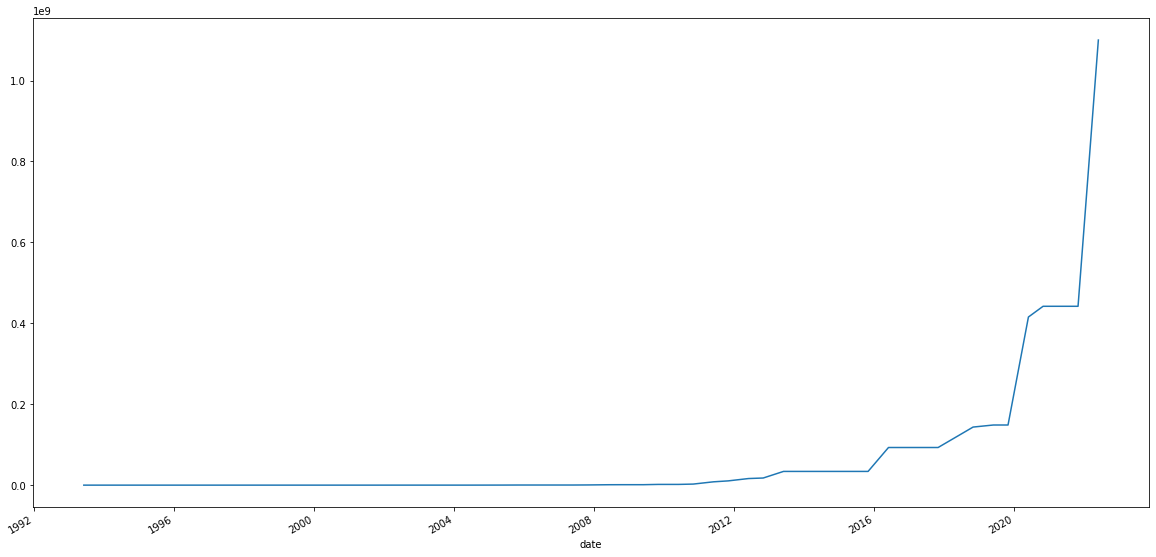

In [7]:
df.set_index('date')['value'].plot(figsize=(20, 10))

#### Виден примерно экспоненциальный рост, так что можно попробовать сделать его линейным за счет логарифмирования

In [8]:
df['value_log'] = np.log10(df['value'])

<AxesSubplot:xlabel='date'>

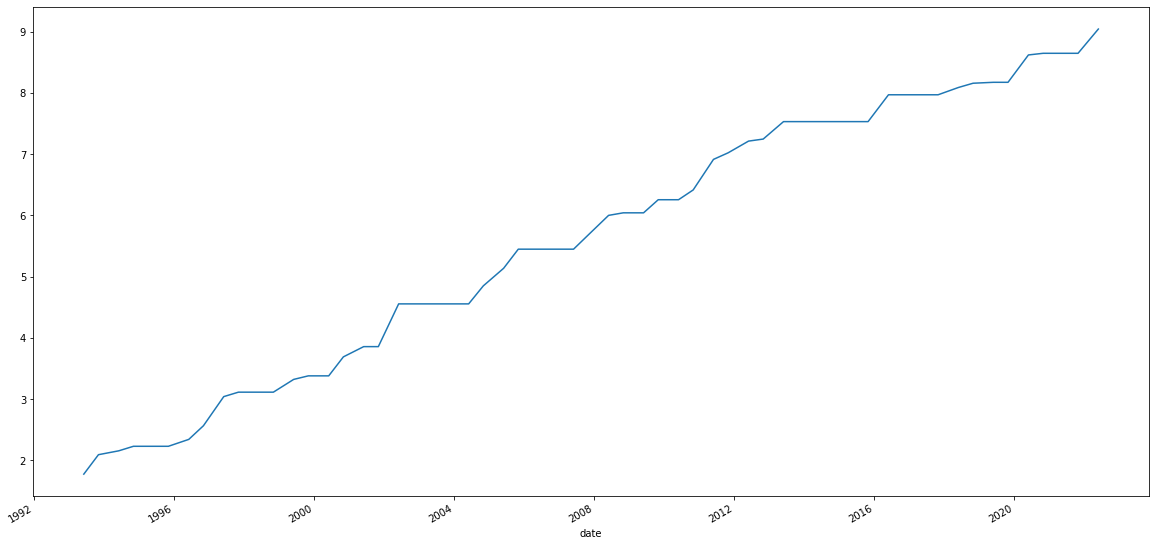

In [9]:
df.set_index('date')['value_log'].plot(figsize=(20, 10))

#### Теперь можно попробовать построить линейную регрессию

In [10]:
df['x'] = df.index

In [11]:
model = LinearRegression()
model.fit(df[['x']], df['value_log'])

LinearRegression()

In [12]:
df

,date,year,month,value,measurement,value_log,x
0,1993-06-01,1993,6,5.970000e+01,GFlop/s,1.775974,0
1,1993-11-01,1993,11,1.240000e+02,GFlop/s,2.093422,1
2,1994-06-01,1994,6,1.434000e+02,GFlop/s,2.156549,2
3,1994-11-01,1994,11,1.700000e+02,GFlop/s,2.230449,3
4,1995-06-01,1995,6,1.700000e+02,GFlop/s,2.230449,4
5,1995-11-01,1995,11,1.700000e+02,GFlop/s,2.230449,5
6,1996-06-01,1996,6,2.204000e+02,GFlop/s,2.343212,6
7,1996-11-01,1996,11,3.682000e+02,GFlop/s,2.566084,7
8,1997-06-01,1997,6,1.100000e+03,GFlop/s,3.041393,8
9,1997-11-01,1997,11,1.300000e+03,GFlop/s,3.113943,9


#### Далее, то, что нас интересует - значение в '2025/06' и '2025/11', что соответствует значениям x = 64 и x = 65 соответственно

In [13]:
# 2022/06
pred = float(model.predict(pd.DataFrame(data={'x': [64]})))
print(10**pred)

11076353376.983253


#### Прогноз к 2022/06: 11076353376 GFlop/s, что в 10 раз больше текущего значения

In [14]:
# 2022/11
pred = float(model.predict(pd.DataFrame(data={'x': [65]})))
print(10**pred)

14838624469.265299


#### Прогноз к 2022/11: 14838624469 GFlop/s, что в 14 раз больше текущего значения

## Задание 2. оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

#### Данные по общему потреблению энергии взяты по ссылке https://ourworldindata.org/grapher/electricity-prod-source-stacked. В силу того, что максимум там данные за 2020 год, сравнивать буду по этому году

In [15]:
total = pd.read_csv('electricity-prod-source-stacked_2020.csv')

In [16]:
total = total.loc[total['Code'] == 'OWID_WRL']

In [17]:
total

,Entity,Code,Year,Other renewables including bioenergy (TWh),Electricity from solar (TWh),Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from nuclear (TWh),Electricity from oil (TWh),Electricity from gas (TWh),Electricity from coal (TWh)
251,World,OWID_WRL,2020,703.916443,846.22937,1596.428223,4345.990234,2693.978516,661.65863,6371.650391,9439.265625


In [18]:
# Данные в Twh
total_energy = total[['Other renewables including bioenergy (TWh)',
       'Electricity from solar (TWh)', 'Electricity from wind (TWh)',
       'Electricity from hydro (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from oil (TWh)', 'Electricity from gas (TWh)',
       'Electricity from coal (TWh)']].sum().sum()
total_energy

26659.117431640625

In [19]:
df = pd.read_excel('TOP500_202011.xlsx')

In [20]:
df

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,Segment,Total Cores,Accelerator/Co-Processor Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Nmax,Nhalf,HPCG [TFlop/s],Power (kW),Power Source,Power Efficiency [GFlops/Watts],Memory,Architecture,Processor,Processor Technology,Processor Speed (MHz),Operating System,OS Family,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,1.0,55,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,Research,7630848,NaN,442010.00000,537212.000,21288960.0,NaN,16004.500,29899.23,Submitted,14.783324,NaN,MPP,A64FX 48C 2.2GHz,Fujitsu ARM,2200,Red Hat Enterprise Linux,Linux,None,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,50831,179807
1,2,2.0,51,1,Summit,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,Research,2414592,2211840.0,148600.00000,200794.880,16473600.0,NaN,2925.750,10096.00,Submitted,14.718700,NaN,Cluster,IBM POWER9 22C 3.07GHz,Power,3070,RHEL 7.4,Linux,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,48553,179397
2,3,3.0,51,3,Sierra,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,Research,1572480,1382400.0,94640.00000,125712.000,11902464.0,NaN,1795.670,7438.28,Submitted,12.723372,NaN,Cluster,IBM POWER9 22C 3.1GHz,Power,3100,Red Hat Enterprise Linux,Linux,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,49763,179398
3,4,4.0,47,1,Sunway TaihuLight,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway",National Supercomputing Center in Wuxi,NRCPC,China,2016,Research,10649600,NaN,93014.59388,125435.904,12288000.0,NaN,480.848,15371.00,Submitted,6.051304,NaN,MPP,Sunway SW26010 260C 1.45GHz,ShenWei,1450,Sunway RaiseOS 2.0.5,Linux,None,260,Sunway,Sunway MPP,Sunway Cluster,Custom Interconnect,Sunway,Asia,50623,178764
4,5,7.0,55,7,Selene,"NVIDIA DGX A100, AMD EPYC 7742 64C 2.25GHz, NV...",NVIDIA Corporation,Nvidia,United States,2020,Vendor,555520,483840.0,63460.00000,79215.000,6598656.0,NaN,1622.510,2646.00,Submitted,23.983371,NaN,Cluster,AMD EPYC 7742 64C 2.25GHz,AMD Zen-2 (Rome),2250,Ubuntu 20.04.1 LTS,Linux,NVIDIA A100,64,AMD Rome,NVIDIA DGX A100,NVIDIA DGX,Infiniband,Mellanox HDR Infiniband,North America,48448,179842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,459.0,52,237,NaN,"HPE SGI 8600, Xeon Gold 6148 20C 2.4GHz, 4xEDR...",Central Research Institute of Electric Power I...,HPE,Japan,2018,Research,26400,NaN,1326.25000,2027.520,2525184.0,NaN,NaN,357.55,Submitted,3.709271,NaN,Cluster,Xeon Gold 6148 20C 2.4GHz,Intel Skylake,2400,Red Hat Enterprise Linux,Linux,None,20,Xeon Gold,HPE SGI 8600,HPE SGI 8600,Infiniband,4xEDR Infiniband,Asia,47530,179563
496,497,460.0,50,96,Taiwania,"PRIMERGY CX2550 M4/CX2560 M4/CX2570 M4, Xeon G...",National Center for High Performance Computing,Fujitsu,Taiwan,2017,Research,27200,NaN,1325.15000,2088.960,3707904.0,NaN,NaN,332.00,Submitted,3.991416,NaN,Cluster,Xeon Gold 6148 20C 2.4GHz,Intel Skylake,2400,Linux,Linux,None,20,Xeon Gold,PRIMERGY CX2550 M4/CX2560 M4/CX2570 M4,Fujitsu PRIMERGY,Omnipath,Intel Omni-Path,Asia,48468,179170
497,498,461.0,51,149,Internet Company T EE2,"Lenovo HR650x, Xeon Gold 6133 20C 2.5GHz, 25G ...",Service Provider T,Lenovo,China,2018,Industry,30000,NaN,1319.52000,2400.000,3794688.0,NaN,NaN,NaN,NaN,NaN,NaN,Cluster,Xeon Gold 6133 20C 2.5GHz,Intel Skylake,2500,Linux,Linux,None,20,Xeon Gold,ThinkSystem HR650X,Lenovo ThinkSystem,Gigabit Ethernet,25G Ethernet,Asia,50329,179352
498,4

In [21]:
df['Power (kW)'].isnull().sum()

311

#### В силу того, что много пустых значений, то возьмем среднее потребление машин и умножим на 500

In [22]:
top500_energy = df['Power (kW)'].mean() * 500
top500_energy

863816.1375661375

#### Чтобы получить количество энергии, которое было потреблено(kwh) надо умножить на кол-во часов в году

In [23]:
top500_energy *= (24 * 366)
top500_energy

7587760952.380952

#### Это в kwh, теперь переведем в Twh, то есть надо разделить на 10^9

In [24]:
top500_energy /= 10**9
top500_energy

7.587760952380952

#### Ответ на вопрос в процентах

In [25]:
100 * top500_energy / total_energy

0.028462161104310775